<a href="https://colab.research.google.com/github/cindiponce2004/bio2110-project-Cindi-P/blob/main/notebooks/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
pwd

'/content/drive'

In [22]:
cd /content/drive/MyDrive/BIO2110 Project/

/content/drive/.shortcut-targets-by-id/1N8UHVLgE4SYsHwpmzxL_C_tJ4T4Gn4uq/BIO2110 Project


In [ ]:
ls

 immunization_data.csv       Main_Routine_Vaccine_Demo.csv
 Location_vaccine_data.csv  'Project charts'


In [23]:
df=pd.read_csv("immunization_data.csv")

Pie chart of the percent of flu vaccines in each race

In [ ]:
flu_df=df[df["VACCINE_GROUP"] == "Flu"]

In [ ]:
race_vaccinated = (
    flu_df.groupby("RACE_ETHNICITY")["COUNT_PEOPLE_VAC"]
    .sum()
)

In [ ]:
race_percent= (race_vaccinated/race_vaccinated.sum()) *100

In [ ]:
import matplotlib.pyplot as plt

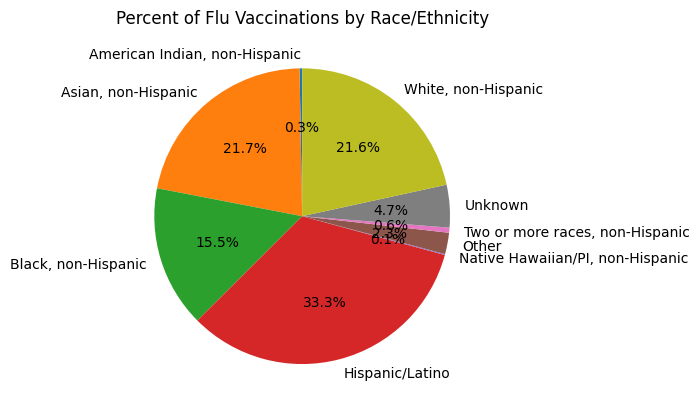

In [ ]:
plt.pie(
    race_percent,
    labels=race_percent.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Percent of Flu Vaccinations by Race/Ethnicity")
plt.savefig
plt.show()

**Bar plot: of the amount of vaccines per age group**

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [32]:
df= pd.read_csv("Main_Routine_Vaccine_Demo.csv")

In [33]:
flu_df=df[df["VACCINE_GROUP"] == "Flu"]

In [ ]:
age_vaccinated = flu_df.groupby("AGE_GROUP")["COUNT_PEOPLE_VAC"].sum()

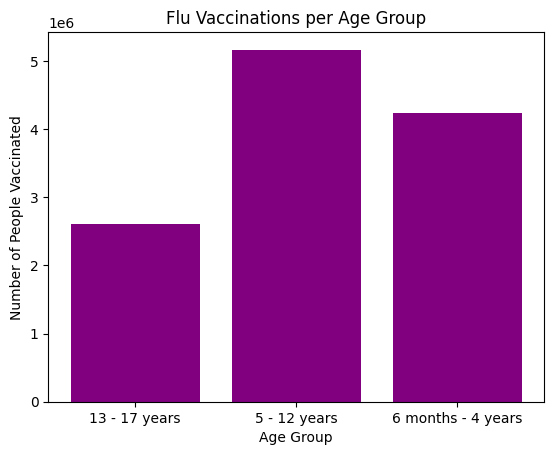

In [ ]:
plt.bar(age_vaccinated.index, age_vaccinated.values, color='purple')
plt.xlabel("Age Group")
plt.ylabel("Number of People Vaccinated")
plt.title("Flu Vaccinations per Age Group")
plt.show()

**Bar Plot**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    "flu_2022.csv",
    "flu_2023.csv",
    "flu_2024.csv"
]

dfs = [pd.read_csv(file) for file in files]

In [30]:
neighborhood_to_borough = {

    "Chelsea/NoMad/West Chelsea": "Manhattan",
    "Chinatown/Lower East Side": "Manhattan",
    "East Village/Gramercy/Greenwich Village": "Manhattan",
    "Financial District": "Manhattan",
    "Harlem": "Manhattan",
    "Upper East Side": "Manhattan",
    "Upper West Side": "Manhattan",

    "Bedford Stuyvesant": "Brooklyn",
    "Bushwick": "Brooklyn",
    "Crown Heights": "Brooklyn",
    "Sunset Park": "Brooklyn",

    "Astoria": "Queens",
    "Flushing": "Queens",
    "Jamaica": "Queens",
    "Long Island City": "Queens",

    "Central Bronx": "Bronx",
    "North Bronx": "Bronx",
    "South Bronx": "Bronx",

   "Silver Lake/St. George": "Staten Island",
    "Elm Park": "Staten Island",
    "Graniteville/Mariner's Harbor/Port Ivory": "Staten Island",
    "New Dorp/Todt Hill": "Staten Island",
    "Arrochar/Midland Beach/Shore Acres/South Beach Ocean Breeze": "Staten Island",
    "Lighthouse Hill/Midland Beach/New Dorp/Oakwood": "Staten Island",
    "Tottenville": "Staten Island",
    "Great Kills": "Staten Island",
    "Charleston/Prince's Bay/Woodrow": "Staten Island",
    "Port Richmond/Randall Manor/West Brighton": "Staten Island",
    "Annadale/Rossville": "Staten Island",
    "Bloomfield/Freshkills Park": "Staten Island"
}

In [ ]:
borough_years = []

for df in dfs:
    df["Borough"] = df["NEIGHBORHOOD_NAME"].map(neighborhood_to_borough)

    borough_summary = (
        df.groupby("Borough")["PERC_VAC"]
        .mean()
        .reset_index()
    )

    borough_summary["Year"] = df["YEAR_COVERAGE"].iloc[0]
    borough_years.append(borough_summary)

In [ ]:
final_df = pd.concat(borough_years)

In [ ]:
plot_df = final_df.pivot(index="Year", columns="Borough", values="PERC_VAC")

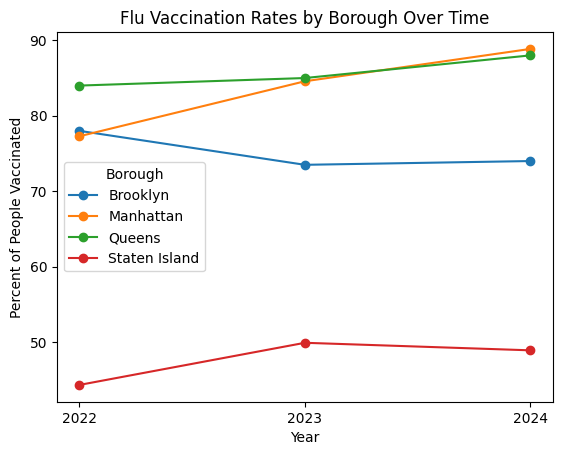

In [ ]:
plot_df.plot(marker="o")

plt.xlabel("Year")
plt.ylabel("Percent of People Vaccinated")
plt.title("Flu Vaccination Rates by Borough Over Time")
plt.legend(title="Borough")
plt.xticks([2022, 2023, 2024])
plt.show()

Vaccination rates of race/ethnicities and Age groups

In [46]:
df = pd.read_csv("immunization_data.csv")


columns_needed = ["AGE_GROUP", "YEAR_COVERAGE", "RACE_ETHNICITY", "COUNT_PEOPLE_VAC", "POP_DENOMINATOR"]
df_subset = df[columns_needed].copy()


df_subset["percent_vaccinated"] = (df_subset["COUNT_PEOPLE_VAC"] / df_subset["POP_DENOMINATOR"]) * 100

summary = df_subset.groupby(["AGE_GROUP", "RACE_ETHNICITY", "YEAR_COVERAGE"]).agg(
    total_vaccinated=("COUNT_PEOPLE_VAC", "sum"),
    total_population=("POP_DENOMINATOR", "sum")
).reset_index()

summary["percent_vaccinated"] = (summary["total_vaccinated"] / summary["total_population"]) * 100



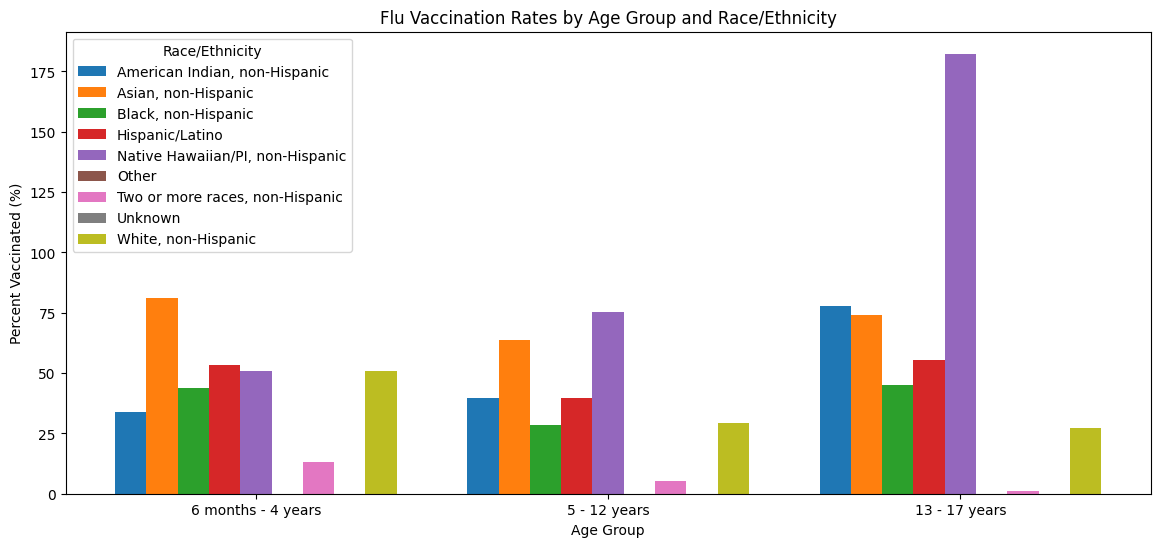

In [56]:
import matplotlib.pyplot as plt
import numpy as np


age_groups = summary["AGE_GROUP"].unique()

ethnicities = sorted(summary["RACE_ETHNICITY"].unique())
n_age=len(age_groups)
n_eth =len(ethnicities)

total_width = 0.8

bar_width = total_width / n_eth
x = np.arange(n_age)

plt.figure(figsize=(14,6))


for i, ethnicity in enumerate(ethnicities):        # enumerate is used to use index and the value of items in a list.
    values = []
    for age in age_groups:

        val = summary[(summary["AGE_GROUP"] == age) &
                      (summary["RACE_ETHNICITY"] == ethnicity)]["percent_vaccinated"].mean()
        values.append(val)

    plt.bar(x - total_width/2 + i*bar_width + bar_width/2, values, width=bar_width, label=ethnicity)



plt.xlabel("Age Group")
plt.ylabel("Percent Vaccinated (%)")
plt.title("Flu Vaccination Rates by Age Group and Race/Ethnicity")
plt.xticks(x, age_groups)
plt.legend(title="Race/Ethnicity")
plt.show()